In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='ticks', font_scale=1.7)

Методом простой итерации найти ширину функции на полувысоте с точностью $ eps = 10^{-3} $

$$ f(x) = x \cdot e^{-x^{2}}, \: x \geqslant  0  $$

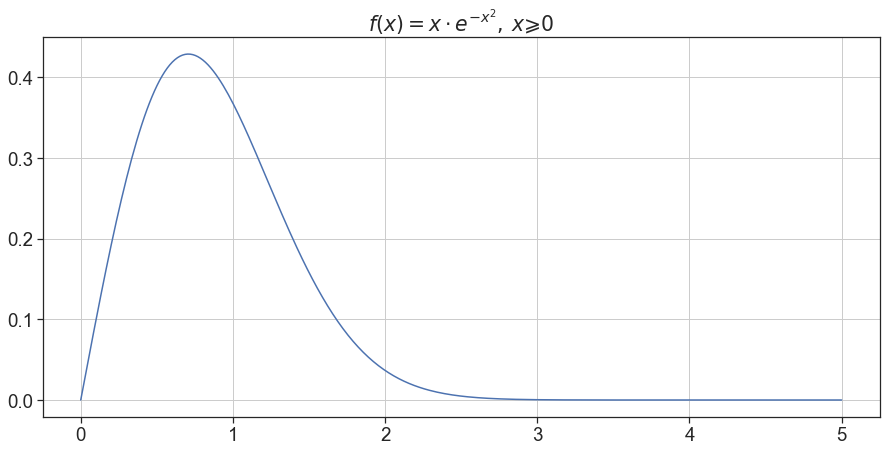

In [2]:
x = np.linspace(0, 5, 300)
def f(x):
    return x * np.exp(-x**2)
y = f(x)

plt.figure(figsize=(15, 7))
plt.plot(x, y)
plt.title(r'$ f(x) = x \cdot e^{-x^{2}}, \: x \geqslant  0  $')
plt.grid()

Необходимо найти значения $ x_{0}, \: такие\:что \: f(x_{0}) = \frac{f(x_{max})}{2} \pm eps $

In [3]:
xmax = 1 / np.sqrt(2)
fhalf = f(xmax) / 2
fhalf

0.21444097124017672

Задача сводится к поиску корней уравнения:
$$ f(x) = x \cdot e^{-x^{2}} - f_{half} = 0, $$
$$ где \: f_{half} = \frac{f(x_{max})}{2} = 0.21444... $$
с точностью $eps = 10^{-3}$

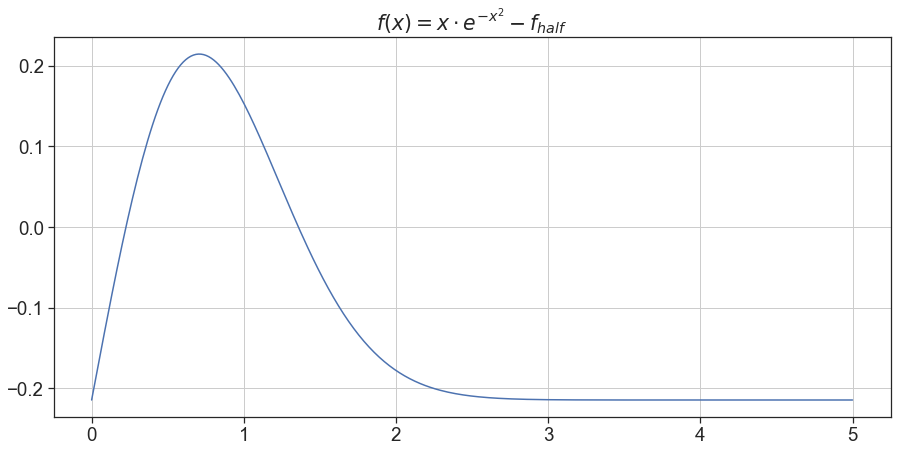

In [5]:
x = np.linspace(0, 5, 300)
y = x * np.exp(-(x**2)) - fhalf

plt.figure(figsize=(15, 7))
plt.plot(x, y)
plt.title(r'$f(x) = x \cdot e^{-x^{2}} - f_{half}$')
plt.grid()

Первый отрезок локализации: $[0, \frac{1}{2}]$ - для левого корня

На нем $$ x = \varphi_{1}(x) = f_{half} \cdot e^{x^{2}} $$

удовлетворяет условию сходимости






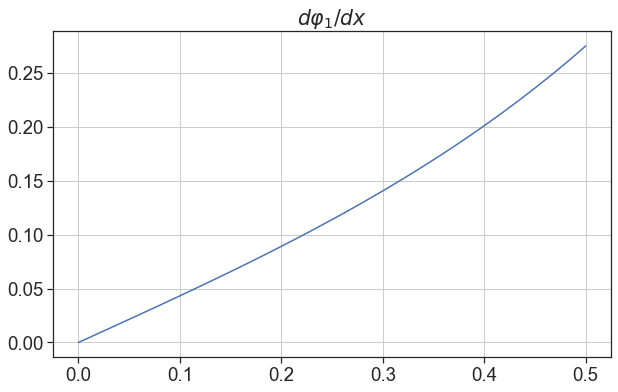

In [9]:
# график производной ф-ии fi_1
x = np.linspace(0, 0.5, 100)
y = 2*fhalf*x*np.exp(x**2)

plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.title(r"$d \varphi_{1} / dx$")
plt.grid()

In [99]:
def fi_1(x):
    return fhalf * np.exp(x**2)

Ищем первый корень

Пусть q = 0.3

In [100]:
q = 0.3
eps = 10e-3
x0 = 0.1  # некоторое начальное приближение
xn = x0 
xn1 = fi_1(x0)

while abs(xn1 - xn) / (1 - q) > eps:
    xn = xn1
    xn1 = fi_1(xn)

In [101]:
x1 = xn1
x1

0.22555025664820427

Второй отрезок локализации: $[1, 2]$ - для правого корня

На нем $$ x = \varphi_{2}(x) = \sqrt{ln \left ( \frac{x}{f_{half}}    \right )} $$

удовлетворяет условию сходимости

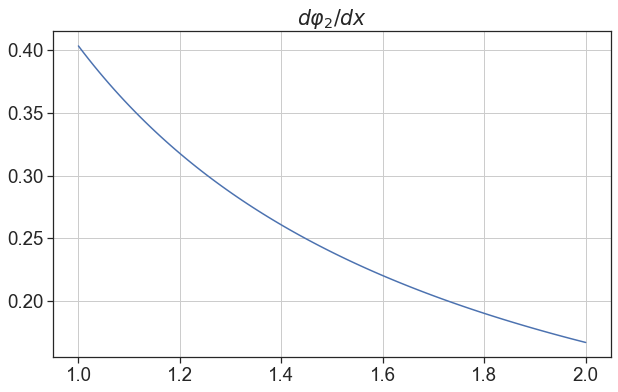

In [8]:
# график производной ф-ии fi_2
x = np.linspace(1, 2, 100)
y = 1 / (2*x*np.sqrt(np.log(x/fhalf)))

plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.title(r"$d \varphi_{2} / dx$")
plt.grid()

In [103]:
def fi_2(x):
    return np.sqrt(np.log(x / fhalf))

Ищем второй корень

Пусть q = 0.45

In [104]:
q = 0.45
eps = 10e-3
x0 = 1.5  # некоторое начальное приближение
xn = x0 
xn1 = fi_2(x0)

while abs(xn1 - xn) / (1 - q) > eps:
    xn = xn1
    xn1 = fi_2(xn)

In [105]:
x2 = xn1
x2

1.3594900129237655

**Ответ**
(ширина функции на полувысоте)

In [106]:
x2 - x1

1.133939756275561